## Introduction

<font size=3>In supervised learning approach, choosing a parametric model (e.g. linear reg, logistic reg and so on) is the most preferable way to do the predictive analysis since the mathematical derivation for finding the optimal parameters $\boldsymbol\theta$ via derivative for point estimate $\boldsymbol{\hat\theta}$ || maximum likelihood $p(\mathbf{y}|\mathbf{X}, \boldsymbol\theta)$ or maximum a posteriori $p(\boldsymbol\theta|\mathbf{y},\mathbf{X})$ is somehow attractive and straightforward.<br><br>
However, when it comes to data with high complexity (non-linear relationships in data), the number of parameters must be increased so as to explain the data reasonably well that is when parametric models are no longer useful since the number of parameters are fixed.<br><br>
One of the most renowned solutions is to use non-parametric methods, to be precise, the number of parameters depend on the dataset size when applying non-parametric approach.<br><br>
A typical example would be the Gaussian Process (GPs). GPs is a non-parametric method since it, instead of inferring a distribution over the parameters, infers a distribution over the functions directly. A Gaussian process defines a prior over functions and after having observed some function values it can be converted into a posterior over functions => Inference of continuous function values in this context is known as GPs regression but GPs can also be used in classification. 

</font>

## Gaussian Process definition

<font size=3>
    A Gaussian process (GPs) is a non-parametric and probabilistic model for nonlinear relationships. The more data arrives the more flexibility and complexity the model could be when using GPs.The figure below illustrates an example of using GP as a regression method to approximate function $f(x) = xsin(x)$.
</font>

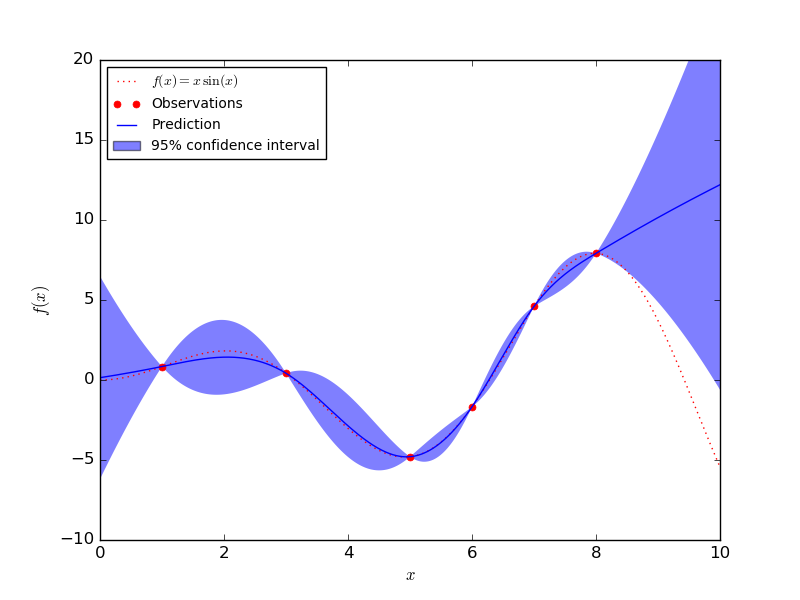

<font size=3>
GPs assumes that any point $\mathbf{x}\in \mathbb{R}^d$ is assigned a random variable $f(\mathbf{x})$ and the joint distribution of a finute number of these variables $p(f(\mathbf{x}_1),..., f(\mathbf{x}_N))$ is itself a Gaussian distribution:
<br><br>   
    <center> $p(\mathbf{f}|\mathbf{X}) = \mathcal{N}(\mathbf{f}|\mathbf{\mu}, \mathbf{K}) \tag{1}$ </center>

<br><br>
    which is similar to:
<br><br>   
    <center>
        $\begin{pmatrix}
            f(\mathbf{x}_1)\\
            \vdots\\
            f(\mathbf{x}_N)
        \end{pmatrix}
        \sim
        \mathcal{N}(\mathbf{f}|\mathbf{\mu}, \mathbf{K})
        $
    </center>

<br><br>
    where
<br><br>
    <center>
        $\mu = \begin{bmatrix} \mu_1 \\ \vdots\\ \mu_N \end{bmatrix}\space\space$ 
        and 
        $\space\space \mathbf{K} = 
            \begin{bmatrix}
                \mathbf{K}_{1i} & \mathbf{K}_{ij}\\
                \mathbf{K}_{ij}^{T} & \mathbf{K}_{jN}
            \end{bmatrix}
        $
    </center>

<br><br>
    in which $\mathbf{K}_{1i}$ is a kernel block matrix contains 2-input kernel values
<br><br>
    <center>
        $
        \begin{bmatrix}
            k(\mathbf{x}_1, \mathbf{x}_1) & k(\mathbf{x}_1, \mathbf{x}_2) & \dots & k(\mathbf{x}_1, \mathbf{x}_i)\\
            k(\mathbf{x}_2, \mathbf{x}_1) & k(\mathbf{x}_2, \mathbf{x}_2) & \dots & k(\mathbf{x}_2, \mathbf{x}_i)\\
            \vdots & \vdots & \vdots & \vdots\\
            k(\mathbf{x}_i, \mathbf{x}_1) & k(\mathbf{x}_i, \mathbf{x}_2) & \dots & k(\mathbf{x}_i, \mathbf{x}_i)
        \end{bmatrix}
        $
    </center>

<br><br> 
    This representation of a GPs is similar to a multivariate normal distribution. Instead of displaying samples drawn from this distribution as a vector containing N elements, therefore, it should be represented as a vector containing 2 elements such that $1^{st}$ element has M values and $2^{nd}$ element has Q values, where M + Q = N
<br><br>
    <center>
        $ p(\mathbf{f}|\mathbf{X}) = \begin{pmatrix}
            f(\mathbf{x})\\
            f(\mathbf{x'})
        \end{pmatrix}
        \sim
        \mathcal{N}(\mathbf{f}|\mathbf{\mu}, \mathbf{K})
        $
    </center>

<br><br>
    where
<br><br>
    <center>
        $\mu = \begin{bmatrix} \mu \\ \mu' \end{bmatrix}\space\space$ 
        and 
        $\space\space \mathbf{K} = 
            \begin{bmatrix}
                k(\mathbf{x}, \mathbf{x}) & k(\mathbf{x}, \mathbf{x'})\\
                k(\mathbf{x}, \mathbf{x'})^{T} & k(\mathbf{x'}, \mathbf{x'})
            \end{bmatrix}
        $
    </center>

<br><br> 
    In Equation (1), the covariance of the distribution is defined by the kernel function $\mathbf{K_{ij}} = k(x_i, x_j)$ (it could be squared exponential kernel or linear kernel and so on). Thus, the shape of the function (e.g. smoothness) is defined by $\mathbf{K}$.
<br><br>

A prior GP $p(\mathbf{f}|\mathbf{X})$ can be converted into a GP posterior $p(\mathbf{f}|\mathbf{X}, \mathbf{y})$ after observing some data $\mathbf{y}$. The GP posterior $p(\mathbf{f}|\mathbf{X}, \mathbf{y})$ can then be used to make prediction $\mathbf{f}^{*}$ given new input $\mathbf{X}^{*}$.
<br><br>
    <center>
        ${\hskip 6cm}p(\mathbf{f}^*|\mathbf{X}^*,\mathbf{X},\mathbf{y}) 
= \int{p(\mathbf{f}^*,\mathbf{f}|\mathbf{X}^*,\mathbf{X},\mathbf{y})}d\mathbf{f}{\hskip 2em}(law\space of\space total\space probability) \tag{2}$<br>
        $
{\hskip 11cm}= \int{p(\mathbf{f}^*|\mathbf{f},\mathbf{X}^*,\mathbf{X},\mathbf{y})p(\mathbf{f},\mathbf{X}^*,\mathbf{X},\mathbf{y})}d\mathbf{f} {\hskip 2em} (chain\space rule)\\
{\hskip 11cm}= \int{p(\mathbf{f}^*|\mathbf{f},\mathbf{X}^*)p(\mathbf{f},\mathbf{X},\mathbf{y})}d\mathbf{f} {\hskip 2em} (omitting\space redundant\space variables)\\
{\hskip 11cm}= \int{p(\mathbf{f}^*|\mathbf{f},\mathbf{X}^*)p(\mathbf{f}|\mathbf{X},\mathbf{y})p(\mathbf{X},\mathbf{y})}d\mathbf{f} {\hskip 2em} (chain\space rule)\\
{\hskip 11cm}= \int{p(\mathbf{f}^*|\mathbf{f},\mathbf{X}^*)p(\mathbf{f}|\mathbf{X},\mathbf{y})}d\mathbf{f} {\hskip 2em} (ignore\space normalizing\space const)\\
{\hskip 11cm}= \mathcal{N}(\mathbf{f}^*|\boldsymbol{\mu}^*, \boldsymbol{\Sigma}^*)
        $
    </center>

<br><br>
Evaluating Equation (2) algebra to derive the formula for $\boldsymbol{\mu}^*$ and $\boldsymbol{\Sigma}^*$ isn't quite attractable & it requires complicated linear algebra works. Instead, using the definition of GPs that is both the observations & testing outputs are sampled from the multivariate normal distribution (jointly normal distributed) identified by $\begin{pmatrix} \mathbf{y} \\ \mathbf{f}^*\end{pmatrix} \sim  \mathcal{N} \begin{pmatrix} 0, \begin{pmatrix} \mathbf{K}_y & \mathbf{K}_{*}\\ \mathbf{K}_{*}^T & \mathbf{K}_{**}\end{pmatrix} \end{pmatrix} = p(\mathbf{y}, \mathbf{f}^*| \mathbf{X}, \mathbf{X}^*)$.
<br><br>

Assuming that the mean $\boldsymbol\mu$ is set to 0 for simplicity. The covariance matrix $\mathbf{K}_{y}$ of $\mathbf{y}$ is defined as $Cov(\mathbf{X}, \mathbf{X})$ computing by input data $\mathbf{X}$. By the same token, $\mathbf{K}_{*}$ is assigned 
to $Cov(\mathbf{X}, \mathbf{X}^*)$ and $\mathbf{K}_{**} = Cov(\mathbf{X}^*, \mathbf{X}^*)$.
<br><br>
   
$\longrightarrow$ $p(\mathbf{f}^*|\mathbf{X}^*,\mathbf{X},\mathbf{y})$ can be derived easily since it is the conditional distribution of the joint normal distribution $p(\mathbf{y}, \mathbf{f}^*| \mathbf{X}, \mathbf{X}^*)$ with its mean $\boldsymbol{\mu}^*$ or $\boldsymbol{\mu}_{\mathbf{f}^{*}|\mathbf{y}}$ and covariance $\boldsymbol{\Sigma}^*$ can be defined according to the result $\mathbf{(2.115)}$ from textbook $\textbf{Pattern Recognition and Machine Learning}$,
<br><br>
    <center>
        $\boldsymbol{\mu}^* = \mathbf{K}_*^T \mathbf{K}_y^{-1} \mathbf{y} \tag{3}$<br>
        $\boldsymbol{\Sigma}^* = \mathbf{K}_{**} - \mathbf{K}_*^T \mathbf{K}_y^{-1} \mathbf{K}_*\tag{4}$
    </center>

</font>

## Implementation

In [1]:
# Imports
%matplotlib notebook

import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

sns.set_style('darkgrid')
np.random.seed(42)
#


<font size=3>
    Regarding the kernel function used to evaluate the covariance for a pair of observations, the exponential kernel is carried out for this implementation, also known as Gaussian kernel or RBF kernel: 
<br><br>
    $\kappa(\mathbf{x}_i,\mathbf{x}_j) = \sigma_f^2 \exp(-\frac{1}{2l^2}
  (\mathbf{x}_i - \mathbf{x}_j)^T
  (\mathbf{x}_i - \mathbf{x}_j))\tag{5}$
<br><br>
  The length parameter $l$ controls the smoothness of the function and $\sigma_f$ the vertical variation. For simplicity, we use the same length parameter $l$ for all input dimensions (isotropic kernel).
</font>

In [2]:
def kernel(X1, X2, l=1.0, sigma_f=1.0):
    ''' Isotropic squared exponential kernel. Computes a covariance matrix from points in X1 and X2. Args: X1: Array of m points (m x d). X2: Array of q points (q x d). Returns: Covariance matrix (m x q). '''
    ''' 1st arg = -1 in reshape means that it lets numpy automatically infer the number of elements for the 1st axis 
        if we specified 1 element for the 2nd axis 
        -> np.sum(X1**2, 1).reshape(-1, 1) returns an array with the shape of (m, 1)
        where n is the number of observations in X1
    '''
    ''' X1^2 with shape (m, 1) + X2^2 with (q, ) will return a nxm matrix whose row = element in X1^2 + all elements in X2^2 element-wise
    '''
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

### Define Prior: p(f|X)

<font size=3>
    Asssume that the prior over functions with mean zero and covariance matrix calculated by the RBF kernel with $l = 1$ and $\sigma_f = 1$. The code snippet below is an illustration of drawing 3 random sample functions and plots it together with zero mean and 95% confidence interval (computed from the diagonal of covariance matrix).
</font>

In [3]:
def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):
    '''
        Plot the distribution of functions drawn from GP including the mean function with 95% confidence interval
        
        Parameters
        ----------
        mu: a NumPy array
            The mu values of the GP distribution (could be prior or posterior predictive)
        cov: a NumPy array
            The covariance matrix of the GP distribution (could be prior or posterior predictive)
        X: a NumPy array
            An array of inputs used to compute cov matrix and represented along x-axis
        X_train: a NumPy array
            An array of training inputs used to compute cov matrix 
            and combined with its outputs from posterior predictive dist 
            to form data points with red cross notation on the graph
        Y_train: a NumPy array
            An array of training outputs corresponds with X_train
        samples: a NumPy array
            An array contains sample functions drawn from prior or posterior predictive distribution
        
        Return
        ------
        NoneType
    '''
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')
    plt.legend()

<IPython.core.display.Javascript object>


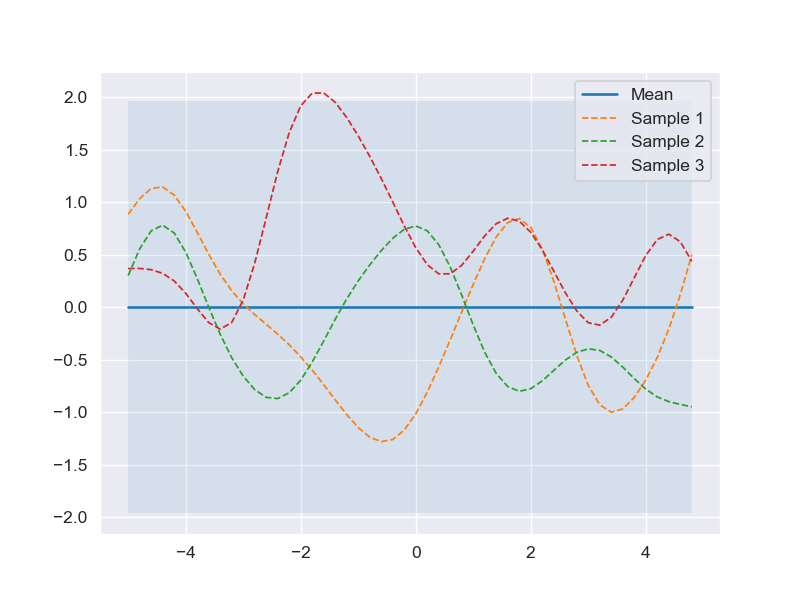

In [4]:
# Finite number of points
X = np.arange(-5, 5, 0.2).reshape(-1, 1)

# Mean and covariance of the prior
mu = np.zeros(X.shape)
cov = kernel(X, X)

# Draw three samples from the prior
samples = np.random.multivariate_normal(mu.ravel(), cov, 3)

# Plot GP mean, confidence interval and samples 
plot_gp(mu, cov, X, samples=samples)

### Define Posterior Predictive: p(f\*|X\*, X, y)

In [5]:
from numpy.linalg import inv

def posterior_predictive(X_test, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    '''
        Compute the mean and the covariance of posterior predictive distribution based on given data including the inference for testing data
        
        Parameters
        ----------
        X_test: a NumPy array
            Input of testing data
        X_train: a NumPy array
            Input of training data
        Y_train: a NumPy array
            Output of training data
        l, sigma_f: float number, default=1.0, 1.0
            Hyper parameter of squared exponential kernel function
        sigma_y: float number, default=1e-8
            Noise assumption parameter the output data
        
        Return
        ------
        mu_s: a NumPy array
            The mean of posterior predictive distribution
        cov_s: a NumPy array
            The covariance matrix of posterior predictive distribution
    '''
    K = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_test, l, sigma_f)
    K_ss = kernel(X_test, X_test, l, sigma_f) + 1e-8 * np.eye(len(X_test))
    K_inv = inv(K)
    
    # Equation (3)
    mu_s = K_s.T.dot(K_inv).dot(Y_train)

    # Equation (4)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)
    return mu_s, cov_s

### Prediction with noise-free assumption 

<font size=3>
    As can be seen from declaration of covariance matrix for the posterior predictive distribution in the part between Equation (2) and Equation (3), if the inference is carried out based on these given assumption, the output of the data would have the form $\mathbf{y} = f(\mathbf{X})$.
<br><br>
    It, therefore, is clear that regardless of the number of attempts trying to predict the output $\mathbf{y}$ with the same input $\mathbf{X}$ the result would still be the same -> no variation (noise) for the outputs with the same input (e.g. 1st time: $f(5) = 10.1$, 2nd time: $f(5) = 10.1$, 3rd time: $f(5) = 10.1)$), which is far removed from the outputs having noise included (e.g. 1st time: $f(5) = 10.1$, 2nd time: $f(5) = 10.5$, 3rd time: $f(5) = 9.8)$).
</font>

<IPython.core.display.Javascript object>


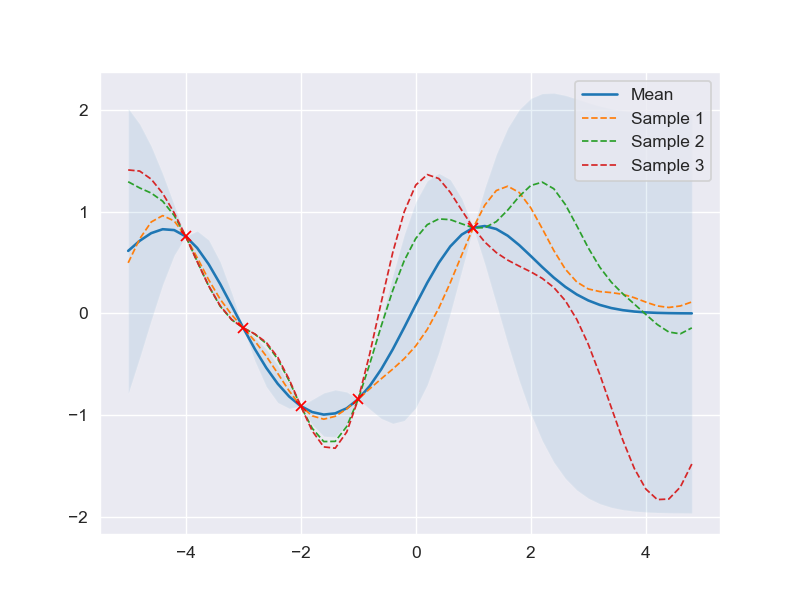

In [6]:
X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
Y_train = np.sin(X_train)
X_test = np.arange(-5, 5, 0.2).reshape(-1, 1)

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X_test, X_train, Y_train)

# Draw three samples from the posterior predictive distribution
samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)

# Plot the result
plt.clf()
plot_gp(mu_s, cov_s, X_test, X_train=X_train, Y_train=Y_train, samples=samples)


### Prediction with noise assumption 

<font size=3>
    When it comes to the practical scenario, there is no mathematical model that can capture all the complexity as well as the variation of the data (a.k.a be able to predict the outcome exactly 100%). 
<br><br>
    That is why introducing the uncertainty to the mathematical model is necessary in order to have a complete picture about the possible values of prediction compared to the real-world results, to be precise, the predictive equation should be <br>
    <center>    $\mathbf{y} = f(\mathbf{X}) + \epsilon$ </center>

<br><br>
    where
<br><br>

$\epsilon$ is an assuming noise factor that can be modeled as a Gaussian distribution $\epsilon \sim \mathcal{N}(0, \sigma^2_y)$, which is a reasonable assumption and straightforward when combining the GP and the noise altogether. 
<br><br>
    Recall the property of the RBF kernel, it is true that when 2 same points $\mathbf{x}_i$ are passed into $\mathcal{k}(\mathbf{x}_i, \mathbf{x}_i)$ would return $\sigma_f^2$ since $\mathbf{x}_i - \mathbf{x}_i = 0$ inside the exponential component of Equation (5) => The variation of every data point is equal to $\sigma_f^2$, which is not enough if we want to increase or decrease the variation of data without affecting the covariance value of 2 different data points since modifying $\sigma_f^2$ to change the variation of data means that the entire covariance matrix will also be altered.
<br><br>
Thus, by adding noise factor $\epsilon$ into covariance matrix $\mathbf{K}$ is not only a better way to model the complexity of data but also a feasible solution for the above issue. Specifically, the result is the summation of MxQ covariance matrix $\mathbf{K}$ and QxQ identity matrix multiplied with a scalar $\sigma^2_y\mathbf{I}$.<br><br>
<center>
    $\mathbf{K} = \mathbf{K} + \sigma^2_y\mathbf{I}$
    <br><br>
    $= \begin{bmatrix}
            k(\mathbf{x}_1, \mathbf{x}_1) + \sigma^2_y & k(\mathbf{x}_1, \mathbf{x}_2) & \dots & k(\mathbf{x}_1, \mathbf{x}_q)\\
            k(\mathbf{x}_2, \mathbf{x}_1) & k(\mathbf{x}_2, \mathbf{x}_2) + \sigma^2_y & \dots & k(\mathbf{x}_2, \mathbf{x}_q)\\
            \vdots & \vdots & \vdots & \vdots\\
            k(\mathbf{x}_m, \mathbf{x}_1) & k(\mathbf{x}_m, \mathbf{x}_2) & \dots & k(\mathbf{x}_m, \mathbf{x}_q) + \sigma^2_y
        \end{bmatrix}_{MxQ}
    $
</center>
</font>

<IPython.core.display.Javascript object>


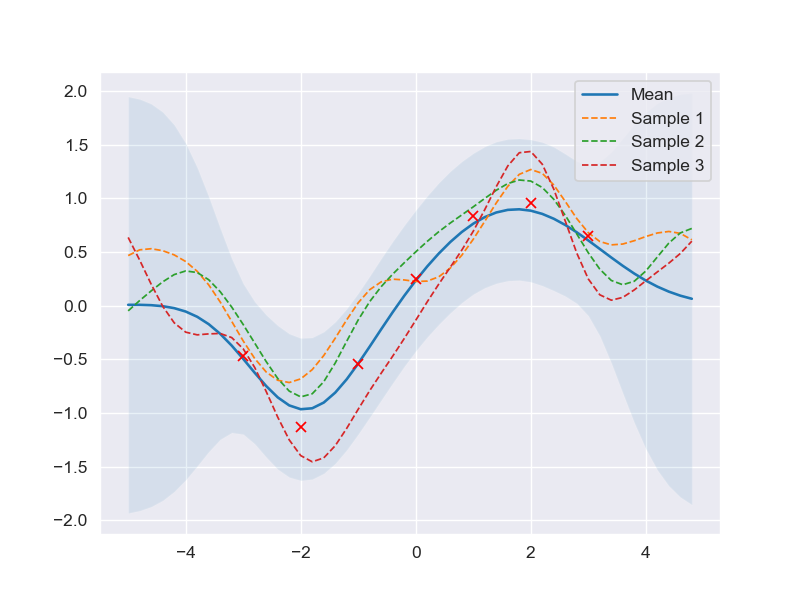

In [7]:
noise = 0.4

# Noisy training data
X_train = np.arange(-3, 4, 1).reshape(-1, 1)
Y_train = np.sin(X_train) + noise * np.random.randn(*X_train.shape)
X_test = np.arange(-5, 5, 0.2).reshape(-1, 1)

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X_test, X_train, Y_train, sigma_y=noise)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plt.clf()
plot_gp(mu_s, cov_s, X_test, X_train=X_train, Y_train=Y_train, samples=samples)

## References

[1]<font size=3> http://krasserm.github.io/2018/03/19/gaussian-processes/ </font><br>
[2]<font size=3> http://katbailey.github.io/post/gaussian-processes-for-dummies/ </font><br>
[3]<font size=3> Christopher M. Bishop. Pattern Recognition and Machine Learning, Chapter 6. </font><br>
